<a href="https://colab.research.google.com/github/Kit1997/Insurance-Claim-Prediction-machine-learning-algorithms-comparison/blob/main/CSE445_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/insurance3r2.csv')

## Data Analyzing

In [ ]:
data.shape

(1338, 9)

In [ ]:
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [ ]:
data.dtypes

age                 int64
sex                 int64
bmi               float64
steps               int64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
data.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

## Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


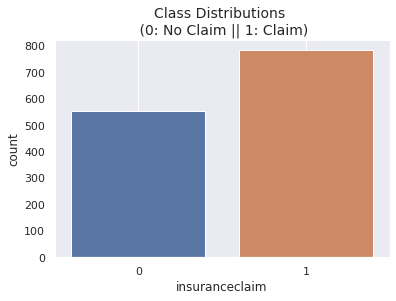

In [ ]:
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)
sns.set(style="darkgrid")
sns.countplot(data['insuranceclaim'])
plt.grid()
plt.show()

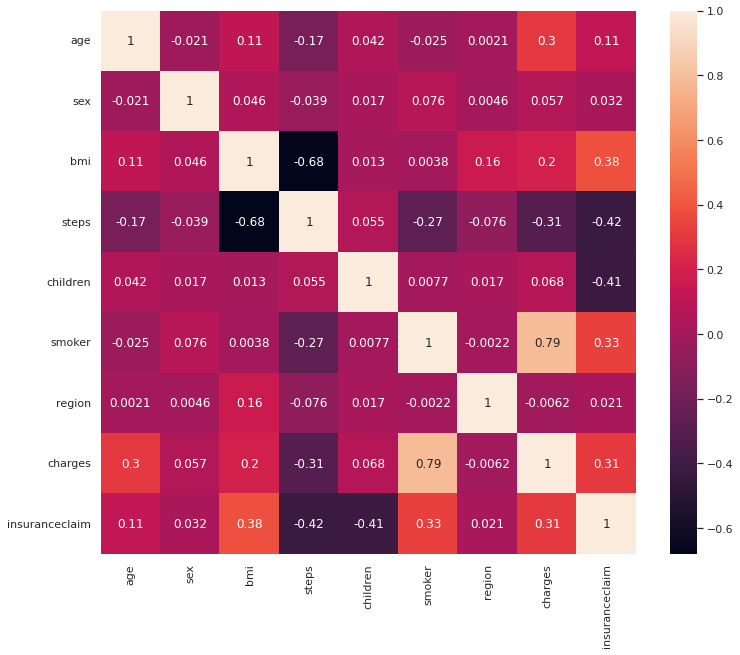

In [ ]:
corr=data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

Text(0.5, 1.0, 'Age vs Charges')

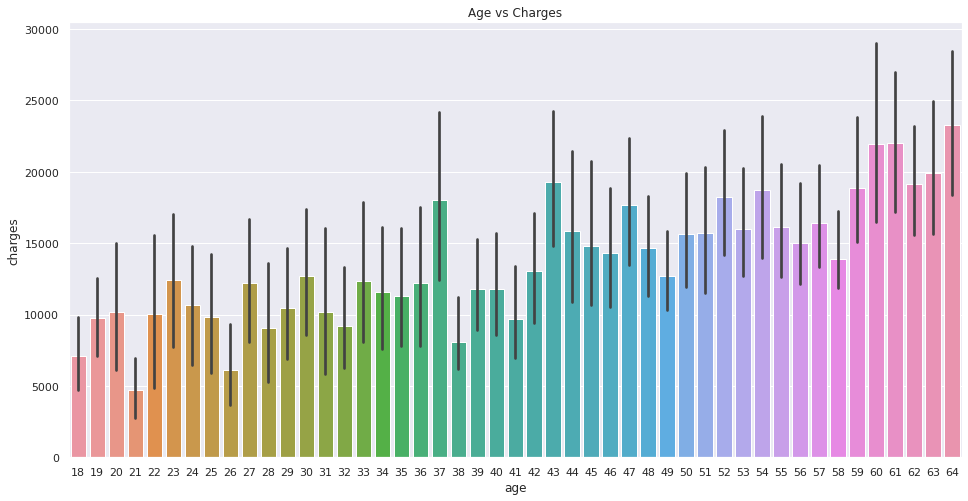

In [ ]:
plt.figure(figsize = (16, 8))
sns.barplot(x = 'age', y = 'charges', data = data)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges\n 0 = female || 1 = male')

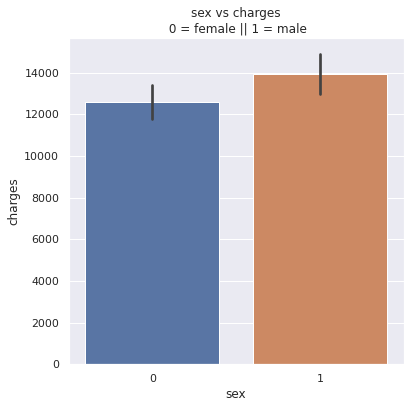

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges\n 0 = female || 1 = male')

Text(0.5, 1.0, 'Number of children vs charges')

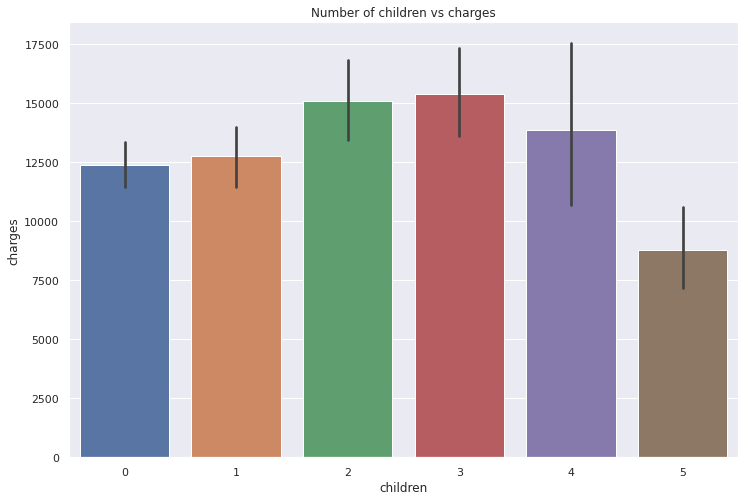

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('Number of children vs charges')

Text(0.5, 1.0, 'smoker vs charges\n0 = non-smoker|| 1 = smoker')

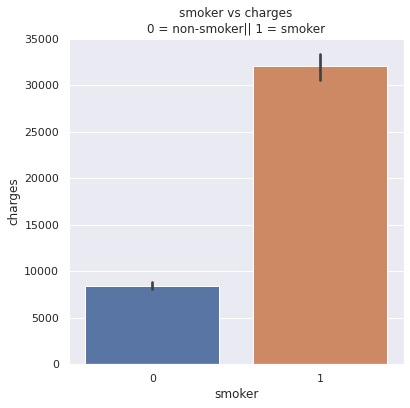

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)
plt.title('smoker vs charges\n0 = non-smoker|| 1 = smoker')

## Data Processe

In [ ]:
data=data.drop('region',axis=1)

data.head()

,age,sex,bmi,steps,children,smoker,charges,insuranceclaim
0,19,0,27.900,3009,0,1,16884.92400,1
1,18,1,33.770,3008,1,0,1725.55230,1
2,28,1,33.000,3009,3,0,4449.46200,0
3,33,1,22.705,10009,0,0,21984.47061,0
4,32,1,28.880,8010,0,0,3866.85520,1


In [ ]:

entry=data.iloc[:,:-1]
result=data.iloc[:,-1]

In [ ]:
entry_train,entry_test,result_train,result_test=train_test_split(entry,result,test_size=0.3,random_state=42)

## Creating a pickle model

In [ ]:
model = open('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/model.pkl','wb')
model.close()


## Linear Regression

In [ ]:
lin_mod_reg = LinearRegression()
lin_mod_reg.fit(entry_train,result_train)
lin_train_pred = lin_mod_reg.predict(entry_train)
lin_test_pred = lin_mod_reg.predict(entry_test)
lin_train_pred = [int(lin_train_pred) for lin_train_pred in lin_train_pred]
lin_test_pred = [int(lin_test_pred) for lin_test_pred in lin_test_pred]
print('Accuracy Score on Linear Regression(train):', int(accuracy_score(result_train,lin_train_pred)*100),"%")
print('Accuracy Score on Linear Regression(test):', int(accuracy_score(result_test,lin_test_pred)*100),"%")
print('RMSE Score on Linear Regression(train): ',int(math.sqrt( metrics.mean_squared_error(result_train,lin_train_pred))*100),"%")
print('RMSE Score on Linear Regression(test): ',int(math.sqrt( metrics.mean_squared_error(result_test,lin_test_pred))*100),"%")

Accuracy Score on Linear Regression(train): 53 %
Accuracy Score on Linear Regression(test): 52 %
RMSE Score on Linear Regression(train):  67 %
RMSE Score on Linear Regression(test):  68 %


In [ ]:
model = open('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/model.pkl','ab+')
pickle.dump(lin_mod_reg,model)
model.close()

## K-Nearest Neighbors

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(entry_train,result_train)
neigh_train_pred = neigh.predict(entry_train)
neigh_test_pred = neigh.predict(entry_test)
neigh_train_pred = [int(neigh_train_pred) for neigh_train_pred in neigh_train_pred]
neigh_test_pred = [int(neigh_test_pred) for neigh_test_pred in neigh_test_pred]
print('Accuracy Score on K-Neighbors(train): ',int(accuracy_score(result_train,neigh_train_pred)*100),"%")
print('RMSE Score on K-Neighbors(train): ',int(math.sqrt( metrics.mean_squared_error(result_train,neigh_train_pred))*100),"%")
print('Accuracy Score on K-Neighbors(test): ',int(accuracy_score(result_test,neigh_test_pred)*100),"%")
print('RMSE Score on K-Neighbors(test): ',int(math.sqrt( metrics.mean_squared_error(result_test,neigh_test_pred))*100),"%")

Accuracy Score on K-Neighbors(train):  82 %
RMSE Score on K-Neighbors(train):  42 %
Accuracy Score on K-Neighbors(test):  59 %
RMSE Score on K-Neighbors(test):  63 %


In [ ]:
model = open('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/model.pkl','ab+')
pickle.dump(neigh,model)
model.close()

## Gradient Boosting Regressor

In [ ]:
gbs = ensemble.GradientBoostingRegressor()
gbs.fit(entry_train, result_train)
reg_train_pred =  gbs.predict(entry_train)
reg_train_pred = [int(reg_train_pred) for reg_train_pred in reg_train_pred]
reg_test_pred =  gbs.predict(entry_test)
reg_test_pred = [int(reg_test_pred) for reg_test_pred in reg_test_pred]
print('Accuracy Score on Decision Tree Classifier(train): ',int(accuracy_score(result_train,reg_train_pred)*100),"%")
print('RMSE Score on Decision Tree Classifie(train): ',int(math.sqrt( metrics.mean_squared_error(result_train,reg_train_pred))*100),"%")
print('Accuracy Score on Decision Tree Classifier(test): ',int(accuracy_score(result_test,reg_test_pred)*100),"%")
print('RMSE Score on Decision Tree Classifie(test): ',int(math.sqrt( metrics.mean_squared_error(result_test,reg_test_pred))*100),"%")

Accuracy Score on Decision Tree Classifier(train):  62 %
RMSE Score on Decision Tree Classifie(train):  60 %
Accuracy Score on Decision Tree Classifier(test):  63 %
RMSE Score on Decision Tree Classifie(test):  60 %


In [ ]:
model = open('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/model.pkl','ab+')
pickle.dump(gbs,model)
model.close()

## Random Forest Classifier

In [ ]:
ram_for= RandomForestClassifier()
ram_for.fit(entry_train, result_train)
ram_for_train_pred=ram_for.predict(entry_train)
ram_for_test_pred=ram_for.predict(entry_test)
print('Accuracy Score on Random Forest Classifier(train): ',int(accuracy_score(result_train,ram_for_train_pred)*100),"%")
print('RMSE Score on Random Forest Classifier(train): ',int(math.sqrt( metrics.mean_squared_error(result_train,ram_for_train_pred))*100),"%")
print('Accuracy Score on Random Forest Classifier(test): ',int(accuracy_score(result_test,ram_for_test_pred)*100),"%")
print('RMSE Score on Random Forest Classifier(test): ',int(math.sqrt( metrics.mean_squared_error(result_test,ram_for_test_pred))*100),"%")

Accuracy Score on Random Forest Classifier(train):  100 %
RMSE Score on Random Forest Classifier(train):  0 %
Accuracy Score on Random Forest Classifier(test):  95 %
RMSE Score on Random Forest Classifier(test):  21 %


In [ ]:
model = open('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/model.pkl','ab+')
pickle.dump(ram_for,model)
model.close()

##Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier(criterion = 'entropy')
dec_tree.fit(entry_train, result_train)
dec_tree_test_pred =  dec_tree.predict(entry_test)
dec_tree_train_pred =  dec_tree.predict(entry_train)
print('Accuracy Score on Decision Tree Classifier(test): ',int(accuracy_score(result_test,dec_tree_test_pred)*100),"%")
print('RMSE Score on Decision Tree Classifie(test): ',int(math.sqrt( metrics.mean_squared_error(result_test,dec_tree_test_pred))*100),"%")
print('Accuracy Score on Decision Tree Classifier(train): ',int(accuracy_score(result_train,dec_tree_train_pred)*100),"%")
print('RMSE Score on Decision Tree Classifie(train): ',int(math.sqrt( metrics.mean_squared_error(result_train,dec_tree_train_pred))*100),"%")

Accuracy Score on Decision Tree Classifier(test):  99 %
RMSE Score on Decision Tree Classifie(test):  9 %
Accuracy Score on Decision Tree Classifier(train):  100 %
RMSE Score on Decision Tree Classifie(train):  0 %


In [ ]:
model = open('/content/drive/MyDrive/semester_213/CSE445/Insurace-Claim-Prediction-Machine-Learning-webApp/model.pkl','ab+')
pickle.dump(dec_tree,model)
model.close()